In [9]:
import pandas as pd

# Load your file
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx", sheet_name="Sheet1")

# Clean the dataset by removing the first two non-data rows
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [10]:
# Initial Inspection

df.shape              # Rows and columns
df.info()             # Data types and missing values
df.describe()         # Summary stats for all numeric columns
df.head()             # Peek at first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 109 entries, Date to PPDA
dtypes: float64(104), object(5)
memory usage: 138.1+ KB


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Throw ins,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,19.0,17.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,13.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,26.0,25.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,25.0,22.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,28.0,24.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21


In [11]:
# Check for missing values:

df.isnull().sum().sort_values(ascending=False)


Accurate forward passes          13
% Accurate forward passes        13
Forward passes                   12
Match                             0
Date                              0
                                 ..
Average passes per possession     0
Long pass %                       0
Average shot distance             0
Average pass length               0
PPDA                              0
Length: 109, dtype: int64

In [12]:
# Clean & Prepare

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [13]:
# Ensure numeric columns are actually numeric:

numeric_cols = df.columns.drop(['Date', 'Match', 'Competition', 'Team', 'Scheme'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [14]:
# Targeted Summary Stats Key Metrics

df[['Goals', 'xG', 'Shots', 'Shots on Target', 'Possession, %']].describe()


,Goals,xG,Shots,Shots on Target,"Possession, %"
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.716049,1.657654,12.530864,4.925926,50.000000
std,1.389710,0.915492,4.937086,2.692422,7.452329
min,0.000000,0.030000,2.000000,0.000000,25.200000
25%,1.000000,0.942500,9.000000,3.000000,45.627500
50%,1.000000,1.545000,12.000000,5.000000,50.000000
75%,2.750000,2.165000,15.000000,7.000000,54.372500
max,6.000000,5.280000,27.000000,13.000000,74.800000


In [15]:
# Targeted Summary Stats Duels and Passing

df[['Duels', 'Duels Won', 'Duels Won%', 'Passes', 'Accurate Passes', '% Accurate Passes']].describe()


,Duels,Duels Won,Duels Won%,Passes,Accurate Passes,% Accurate Passes
count,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000
mean,195.938272,95.024691,48.49963,426.518519,359.395062,83.674074
std,27.530377,15.955275,4.47456,85.888431,84.813230,4.472673
min,144.000000,55.000000,37.89000,168.000000,106.000000,63.100000
25%,177.000000,85.000000,45.08750,369.750000,302.250000,81.477500
50%,193.000000,93.000000,48.61000,425.500000,357.500000,84.485000
75%,211.000000,104.750000,51.82500,471.750000,406.000000,86.440000
max,294.000000,156.000000,58.06000,722.000000,669.000000,92.660000


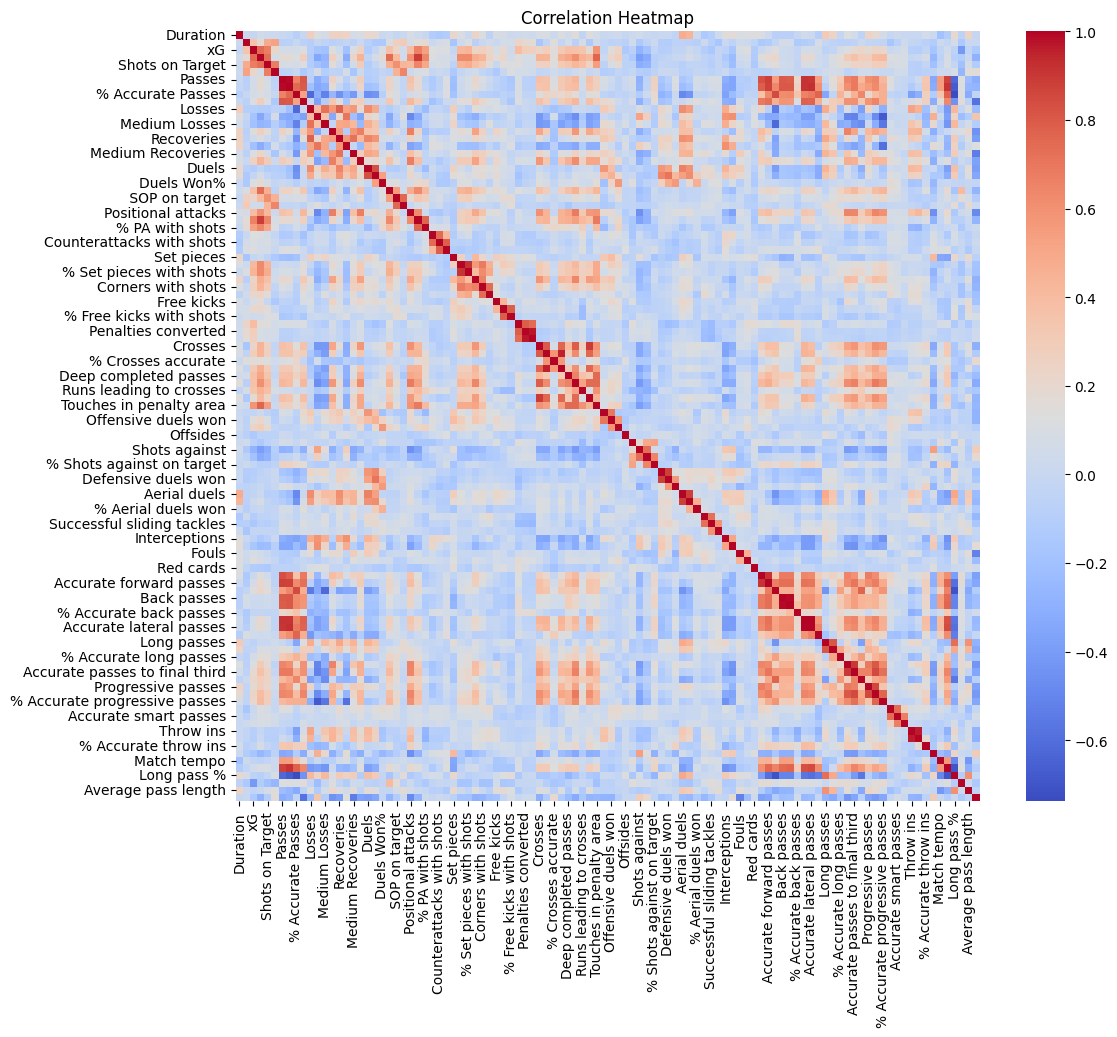

In [16]:
# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


<Axes: title={'center': 'Goals vs xG Over Time'}, xlabel='Date'>

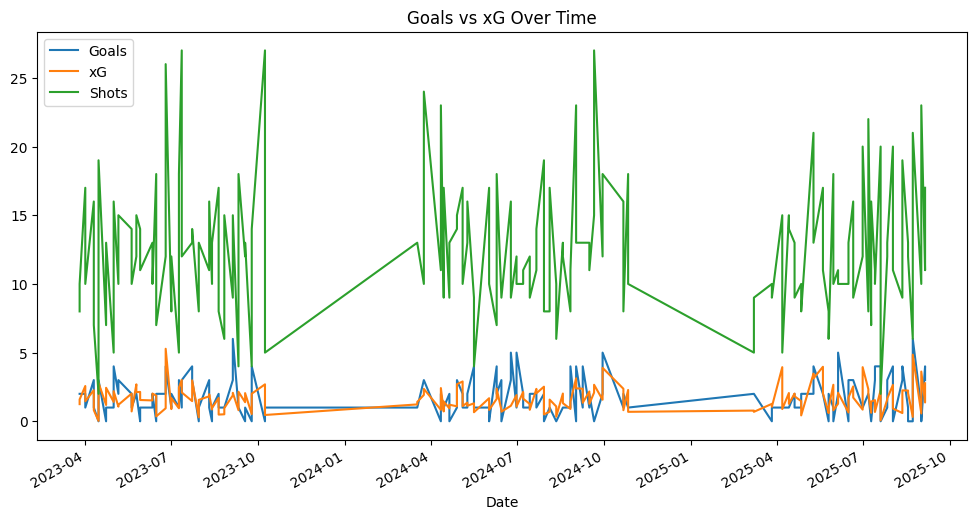

In [17]:
# Time-Based Trends

df.sort_values('Date', inplace=True)
df.set_index('Date')[['Goals', 'xG', 'Shots']].plot(figsize=(12, 6), title='Goals vs xG Over Time')


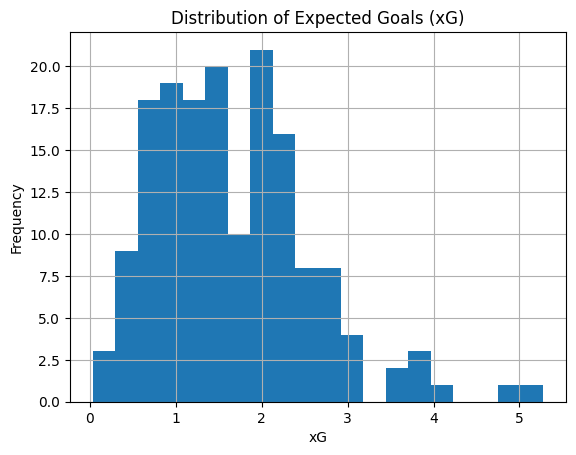

In [18]:
# Distributions & Histograms

df['xG'].hist(bins=20)
plt.title("Distribution of Expected Goals (xG)")
plt.xlabel("xG")
plt.ylabel("Frequency")
plt.show()


In [19]:
# Top Performances / Outliers

df.nlargest(5, 'Goals')[['Match', 'Goals', 'xG']]
df.nsmallest(5, 'PPDA')[['Match', 'PPDA']]  # Most aggressive pressing


,Match,PPDA
144,Crown Legacy FC - Philadelphia Union II (P) 2:2,4.18
20,Crown Legacy FC - Orlando City B 2:2 (P),4.95
114,Crown Legacy FC - New York RB II (P) 1:1,5.23
103,Chicago Fire II - Crown Legacy FC 2:0,5.53
53,Cincinnati II - Crown Legacy FC 1:2,5.80


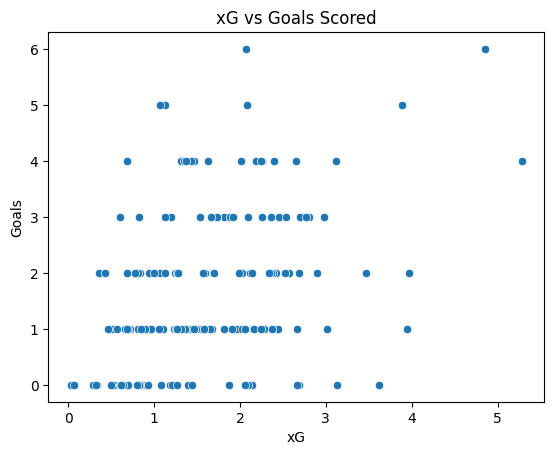

In [20]:
# Relationship Plots

sns.scatterplot(data=df, x='xG', y='Goals')
plt.title("xG vs Goals Scored")
plt.show()


In [21]:
# Grouped Comparisons

df.groupby('Scheme')[['Goals', 'xG', 'Shots']].mean().sort_values(by='Goals', ascending=False)


,Goals,xG,Shots
Scheme,,,
4-2-3-1 (85.14%),5.0,1.13,9.0
4-3-3 (91.9%),4.0,1.43,11.0
4-1-3-2 (49.59%),4.0,1.63,7.0
4-4-2 (88.12%),4.0,3.12,13.0
4-3-3 (68.23%),3.0,2.98,14.0
...,...,...,...
4-4-1-1 (97.47%),0.0,1.27,10.0
4-4-2 (51.49%),0.0,0.07,2.0
4-4-2 (49.51%),0.0,0.50,8.0
